## 1. Runge-Kutta integrator

In this adaptive R-K integrator, we will use initial distance $r = 1+e$, where $e$ is eccentricity, and initial perpendicular velocity $v = \sqrt{(2/r)-1}$.

Use the same equations as the exersice from class and $(x,y,u_x,u_y) = (1+e, 0, 0, \sqrt{(2/r)-1})$.

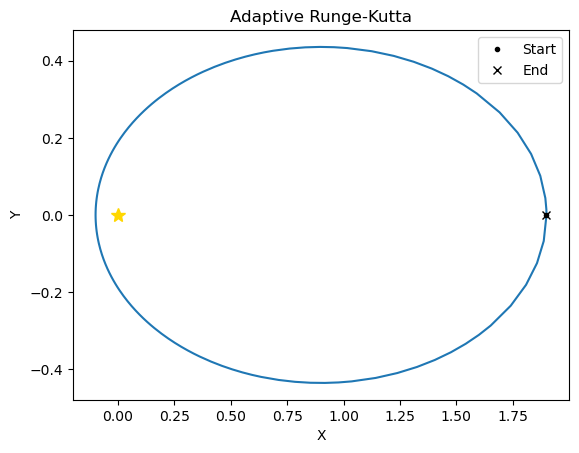

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def derivatives(t, params):
    '''compute derivatives and take x, y, ux, uy as input'''
    x, y, ux, uy = params
    dx_dt = ux
    dy_dt = uy
    
    dux_dt = -x/(x**2 + y**2)**(3/2)
    
    duy_dt = -y/(x**2 + y**2)**(3/2)
    
    return np.array([dx_dt, dy_dt, dux_dt, duy_dt])


def one_rk4(x_before, t, dt, x0, derivs):
    '''Do one Runge-Kutta step'''
    #x = np.zeros((nsteps,len(x0)))
    #x[0] = x0
    
    #for i in range(1,nsteps):    
    f = derivs(t, x_before)
    f1 = derivs(t + dt/2, x_before + f*(dt/2))
    f2 = derivs(t + dt/2, x_before + f1*(dt/2))
    f3 = derivs(t, x_before + f2*dt)
    
    x_now = x_before + dt*(f + 2*f1 + 2*f2 + f3)/6
    
    return x_now


def adaptive_rk4(nsteps, dt, x0, derivs):
    '''Call Runge-Kutta method and update step h'''
    
    #initial step size
    h = dt
    x = np.array([x0])
    
    t = 0
    t_end = 2*np.pi
    tol = 1e-6

    
    while t < t_end:

        if t+h > t_end:
            #adjusting for last step
            h = t_end - t
            
        #for i in range(1, nsteps):
            
        x1 = one_rk4(x[-1], t, h, x0, derivs)
        x2_1 = one_rk4(x[-1], t, h/2, x0, derivs)
        x2_2 = one_rk4(x2_1, t, h/2, x0, derivs)
        error = max(abs(x1 - x2_2))

        while error > tol: 
            #do not accept
            #keep running until step is accepted
            
            #decrease h
            h /= 2

            x1 = one_rk4(x[-1], t, h, x0, derivs)
            x2_1 = one_rk4(x[-1], t, h/2, x0, derivs)
            x2_2 = one_rk4(x2_1, t, h/2, x0, derivs)
            #update error
            error = max(abs(x1-x2_2))

        #accept
        # update time
        t += h
        #increase h
        h *= 2
        
        #update params
        x = np.concatenate((x, [x2_2]), axis=0)
        

    return x


nsteps = 100

#time step
dt = 2*np.pi / (nsteps-1)

e = 0.9
ri = 1+e
vi = np.sqrt((2/ri)-1)

x_start = [ri, 0, 0, vi]

#call method
x = adaptive_rk4(nsteps, dt, x_start, derivatives)

#plt.figure(figsize=(7,7))
plt.plot(0,0, '*', color='gold', markersize=10)
plt.plot(x[:,0], x[:,1])
plt.plot(x[0,0], x[0,1], 'k.', label='Start')
plt.plot(x[-1,0], x[-1,1], 'kx', label='End')
plt.title('Adaptive Runge-Kutta')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

**Compare number of steps needed to achieve $10^{-6}$ accuracy.**

Text(0, 0.5, 'Y')

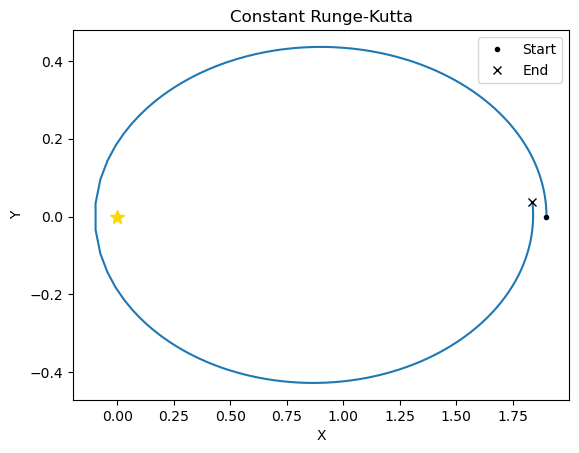

In [60]:
#constant step Runge-Kutta

#taken from class exercise 
def constant_rk4(nsteps, dt, x0, derivs):
    x = np.zeros((nsteps,len(x0)))
    x[0] = x0
    for i in range(1,nsteps):    
        f = derivs((i-1)*dt, x[i-1])
        f1 = derivs((i-1)*dt + dt/2, x[i-1] + f*dt/2)
        f2 = derivs((i-1)*dt + dt/2, x[i-1] + f1*dt/2)
        f3 = derivs(i*dt, x[i-1] + f2*dt)
        x[i] = x[i-1] + dt*(f + 2*f1 + 2*f2 + f3)/6
    return x



N = 400
dt = 2*np.pi/(N-1)

x_c = constant_rk4(N, dt, x_start, derivatives)

plt.plot(0,0, '*', color='gold', markersize=10)
plt.plot(x_c[:,0], x_c[:,1])
plt.plot(x_c[0,0], x_c[0,1], 'k.', label='Start')
plt.plot(x_c[-1,0], x_c[-1,1], 'kx', label='End')
plt.legend()
plt.title('Constant Runge-Kutta')
plt.xlabel('X')
plt.ylabel('Y')

I can see that the constant step size Runge-Kutta has a significantly larger error. Graphically, this can be seen because the start and end do not match; this is a measure of the error. 

For the constant step, this error decreases with increases number of steps. Below, I will find the required $nsteps$ so the error is of the order $10^{-6}$. 

In [57]:
for n in np.array((2, 5, 10, 20, 100, 1000, 2000, 2400)):
    dt = 2*np.pi/(n-1)
    x_adaptive = adaptive_rk4(n, dt, x_start, derivatives)
    x_constant = constant_rk4(n, dt, x_start, derivatives)
    print("nsteps = %d, err adaptive = %lg, err constant = %lg" % (n, x_adaptive[-1,1], x_constant[-1,1]), '\n')

nsteps = 2, err adaptive = 1.05991e-06, err constant = -2.66482 

nsteps = 5, err adaptive = 1.05991e-06, err constant = -17.0412 

nsteps = 10, err adaptive = 9.36612e-07, err constant = -16.15 

nsteps = 20, err adaptive = 4.88193e-07, err constant = -11.4508 

nsteps = 100, err adaptive = 5.1555e-07, err constant = -1.79727 

nsteps = 1000, err adaptive = 9.27639e-07, err constant = 0.000534099 

nsteps = 2000, err adaptive = 8.80639e-07, err constant = 2.22912e-05 

nsteps = 2400, err adaptive = 3.79588e-07, err constant = 9.81992e-06 



For the adaptive step size Runge-Kutta, the error is already of the order of $10^{-6}$ even at 2 steps. This makes sense, because in the adaptive Runge-Kutta, nsteps only determines the initial step size but it does not plat any other role, different to the constant Runge-Kutta. So, in the adaptive version, we start with a small enough dt already and make it smaller/larger depending on the error, but it seems that it is small enough to achieve the required tolerance. 

Additionally, in the adaptive Runge-Kutta, we only accept steps that are smaller than $10^{-6}$; so, it makes sense that the error from start/end is $10^{-6}$. 

Then, as expected, the constant step Runge-Kutta is much less effectif, and reaches an error of $10^{-6}$ at around 2400 steps. 

## 2. Method of lines

For implementing an implicit method, we need to specify the matrix of coefficients for a system of equations:

$$
T_1' = 0
$$

$$
T_2' = \dfrac{T_3 - 2T_2 + T_1}{dx^2}
$$

$$
T_3' = \dfrac{T_4-2T_3+T_2}{dx}
$$

$$\dots$$

$$
T_{N-1}' = \dfrac{T_N - 2T_{N-1}+T_{N-2}}{dx^2}
$$ 

$$
T_N' = 0
$$

So, the matrix has the form:

$$
C = \dfrac{1}{dx^2} 
\begin{bmatrix}
0 & 0 & 0 & 0 & \dots & 0 & 0  \\
1 & -2 & 1 & 0 &\dots & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & \dots & 0 \\
& & &\vdots \\ 
0 & 0 & 0 & 0 & \dots & 0 & 0 
\end{bmatrix}
$$

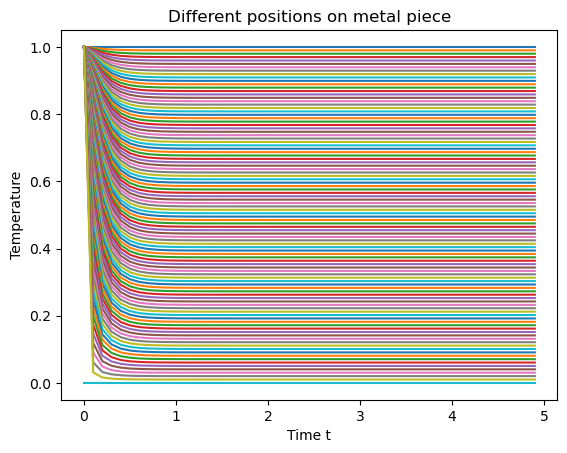

In [47]:
xi = 0
xf = 1

dt = 0.1
tsteps = 50
#dx = 1e-2
N = 100
dx = (xf - xi)/N

#construct temperature array 
metal_T = np.zeros((tsteps, N))


C = np.zeros((N, N))

for i in range(1, N-1):
        C[i][i] = -2
        C[i][i+1] = 1
        C[i][i-1] = 1
C *= (1/dx**2)
#print(C)


A = np.linalg.inv(np.identity(N) - dt*C)

#initial conditions
# at t=0
metal_T[0, :] = 1
metal_T[0, N-1] = 0

#print(metal_T)

for i in range(1, tsteps):
    metal_T[i] = A@metal_T[i-1]

#plot
t = dt*np.arange(tsteps)
#print(metal_T)
#plt.plot(t, metal_T[:,0], label='position')
plt.plot(t, metal_T[:])
plt.title('Different positions on metal piece')
plt.ylabel('Temperature')
plt.xlabel('Time t')
plt.show()

#plt.plot(t, metal_T[:])
#plt.title('Different positions on metal piece')
#plt.ylabel('Temperature')
#plt.xlabel('Time t')
#plt.xlim(0,3)

In the plot above, we see the temperature as a function of time for all the N positions considered accross the metal piece. They all start at T=1, as initialized, and quickly fluctuate to their equilibrium temperature. 

As set up, the top and bottom plates remain constant at T=0,1.

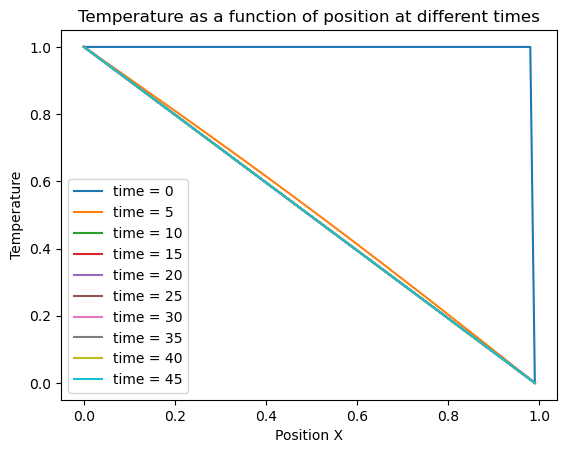

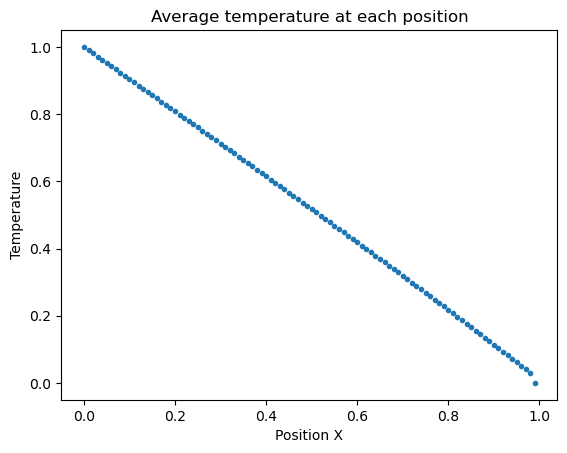

In [50]:
#plt.figure(figsize=(7,7))
for i in range(0, tsteps):
    if i%5==0:
        plt.plot(np.arange(xi, xf, dx), metal_T[i,:], label='time = %i'%i)
plt.legend()
plt.xlabel('Position X')
plt.ylabel('Temperature')
plt.title('Temperature as a function of position at different times')
plt.show()

plt.plot(np.arange(xi, xf, dx), metal_T.mean(axis=0), '.')
plt.xlabel('Position X')
plt.ylabel('Temperature')
plt.title('Average temperature at each position')
plt.show()

As time increases, the temperature accross the metal layers converges to a linear behaviour. 

This behaviour makes sense! We are dealing with diffusion. So, for a plate whose ends are held at constant temperatures we should see a linear trend in the temperature of the layers between them. 